In [1]:
# here we import the necessary data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# import the dataframe for the analysis
# this is a typical import of pandas csv files
# Efficiency wise this is not the most clever way to do!
# But since this is small data this is reasonably fast!
parkinson_df = pd.read_csv("../Data/More/Parkinson.csv")
parkinson_df.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [3]:
#What does this table tell us?
# Gives information about the dtype of each column --> what does this imply?
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 65 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0    Participant  code                                               130 non-null    object 
 1    Age  (years)                                                    130 non-null    int64  
 2   Gender                                                           130 non-null    object 
 3    Positive  history  of  Parkinson  disease  in  family           130 non-null    object 
 4    Age  of  disease  onset  (years)                                130 non-null    object 
 5    Duration  of  disease  from  first  symptoms  (years)           130 non-null    object 
 6    Antidepressant  therapy                                         130 non-null    object 
 7    Antiparkinsonian  medication               

In [4]:
#What does this table tell us
parkinson_df.describe()

,Age (years),Levodopa equivalent (mg/day),Clonazepam (mg/day),Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),...,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
count,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000
mean,64.330769,0.0,0.044231,1.551169,327.276923,10.929769,166.646154,285.761538,53.262846,30.614538,...,1.573923,229.069231,321.392308,45.089692,27.913385,0.045946,-20.033077,4.457692,17.447000,145.20000
std,10.133518,0.0,0.216149,0.019759,47.384951,12.151568,46.487618,51.624885,15.606155,8.550477,...,5.005207,79.696828,73.037475,12.522043,7.645818,0.592294,3.298629,1.791490,4.070072,85.20749
min,34.000000,0.0,0.000000,1.446000,140.000000,-20.320000,96.000000,197.000000,13.720000,17.880000,...,-17.870000,117.000000,211.000000,14.680000,13.370000,-1.417000,-27.310000,1.500000,8.210000,15.00000
25%,58.250000,0.0,0.000000,1.546000,297.250000,3.520000,138.250000,257.000000,42.712500,24.622500,...,-1.527500,177.000000,278.000000,36.987500,22.380000,-0.350000,-22.202500,3.000000,14.570000,90.50000
50%,66.500000,0.0,0.000000,1.556000,335.500000,11.310000,156.000000,276.000000,52.675000,28.560000,...,1.270000,212.500000,312.000000,44.420000,26.875000,0.034000,-20.390000,4.000000,17.585000,127.50000
75%,72.000000,0.0,0.000000,1.563000,358.750000,17.847500,185.000000,304.000000,62.945000,34.750000,...,4.685000,263.250000,348.000000,53.532500,31.370000,0.427500,-17.887500,5.000000,19.892500,176.25000
max,83.000000,0.0,2.000000,1.574000,457.000000,43.370000,388.000000,663.000000,109.500000,64.000000,...,14.640000,611.000000,800.000000,74.160000,58.370000,1.916000,-8.860000,13.500000,28.880000,593.00000


In [5]:
# determine the disease status
# Even when we do this what might be problematic about this classification?
# Think about censoring and incomplete missing data?
parkinson_df["disease_status"] = [0 if "-" in i else 1 for i in parkinson_df[' Age  of  disease  onset  (years) ']]
parkinson_df["disease_status"].value_counts()

1    80
0    50
Name: disease_status, dtype: int64

In [6]:
# Preprocess the Parkinson DataFrame
parkinson_df = parkinson_df.replace("-", np.nan)
parkinson_sliced = parkinson_df.dropna(axis = 1)
parkinson_remove_leaks = parkinson_sliced.drop([' Antiparkinsonian  medication ',
                       ' Levodopa  equivalent  (mg/day) ',
                      ' Clonazepam  (mg/day) ',' Antipsychotic  medication '], axis = 1).set_index(' Participant  code ')
parkinson_remove_leaks.columns

Index([' Age  (years) ', 'Gender', ' Antidepressant  therapy ',
       ' Benzodiazepine  medication ', ' Entropy  of  speech  timing  (-) ',
       ' Rate  of  speech  timing  (-/min) ',
       ' Acceleration  of  speech  timing  (-/min2) ',
       ' Duration  of  pause  intervals  (ms) ',
       ' Duration  of  voiced  intervals  (ms) ',
       ' Gaping  in-between  voiced  intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) ',
       ' Decay  of  unvoiced  fricatives  (‰/min) ',
       ' Relative  loudness  of  respiration  (dB) ',
       ' Pause  intervals  per  respiration  (-) ',
       ' Rate  of  speech  respiration  (-/min) ',
       ' Latency  of  respiratory  exchange  (ms) ',
       ' Entropy  of  speech  timing  (-) .1',
       ' Rate  of  speech  timing  (-/min) .1',
       ' Acceleration  of  speech  timing  (-/min2) .1',
       ' Duration  of  pause  intervals  (ms) .1',
       ' Duration  of  voiced  intervals  (ms) .1',
       ' Gaping  in-between  voice

In [7]:
# retrieve dummies for the object pds
# here we turn our multi categorical data into dummies
# Be cautios there better way to do this --> this enhances the dimensionality of the data 
# Think about ratio encoding and more instead of binary encoding

objected_list_for_dummies = ['Gender',
                             ' Antidepressant  therapy ',
                             ' Benzodiazepine  medication '
                            ]
dummie_variables = pd.get_dummies(parkinson_remove_leaks[objected_list_for_dummies])
parkinson_removed = parkinson_remove_leaks.drop(objected_list_for_dummies, axis = 1)
parkinson_dummies = pd.merge(parkinson_removed, 
                             dummie_variables,
                             how = "left", 
                             right_index = True, 
                             left_index = True)
parkinson_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, PD01 to HC50
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0    Age  (years)                                     130 non-null    int64  
 1    Entropy  of  speech  timing  (-)                 130 non-null    float64
 2    Rate  of  speech  timing  (-/min)                130 non-null    int64  
 3    Acceleration  of  speech  timing  (-/min2)       130 non-null    float64
 4    Duration  of  pause  intervals  (ms)             130 non-null    int64  
 5    Duration  of  voiced  intervals  (ms)            130 non-null    int64  
 6    Gaping  in-between  voiced  intervals  (-/min)   130 non-null    float64
 7    Duration  of  unvoiced  stops  (ms)              130 non-null    float64
 8    Decay  of  unvoiced  fricatives  (‰/min)         130 non-null    float64
 9    Relative  loudness  o

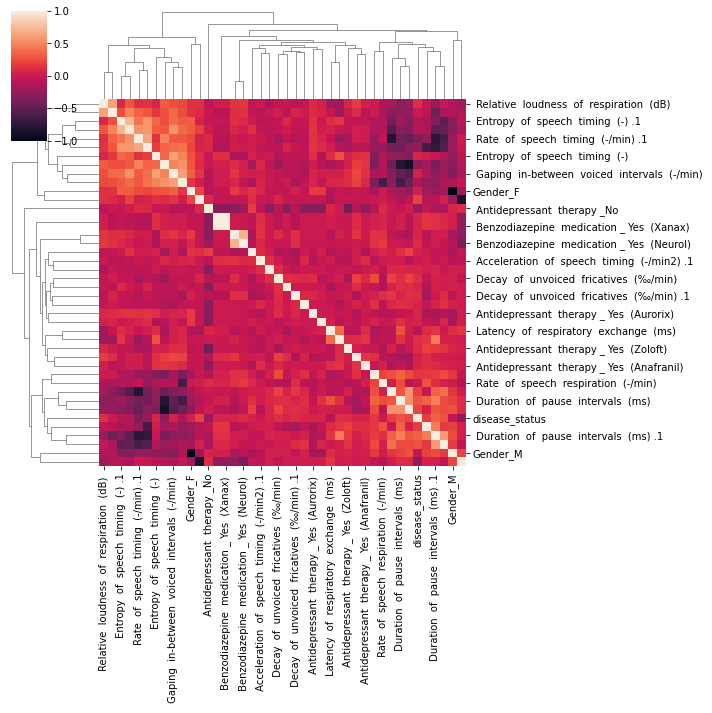

In [8]:
# retrieve the correlation coefficient between the variables
correlation_park = parkinson_dummies.corr(method="spearman")
sns.clustermap(correlation_park)

In [9]:
# Check the correlation of each variable
# This part will be explained
correlation_unstack = correlation_park.unstack().reset_index()
correlation_unstack.columns = ["Var_1","Var_2","correlation"]
correlation_unstack = correlation_unstack[correlation_unstack["correlation"] != 1].sort_values("correlation", ascending = False)

# This part could be a question
def remove_double_inserted_data(data):
    """ This function can be used to retrieve the indeces of the
    doubled data from the unstacked correlation table
    """
    list_of_sets = [] # create a dummy list holding each set
    indeces = [] # create a list which should hold the final indeces
    for i,t in enumerate(data.values):
        if set(t) in list_of_sets:
            continue
        else:
            list_of_sets.append(set(t))
            indeces.append(i)
    return indeces

indexes = remove_double_inserted_data(correlation_unstack)
correlation_unstack = correlation_unstack.iloc[indexes]

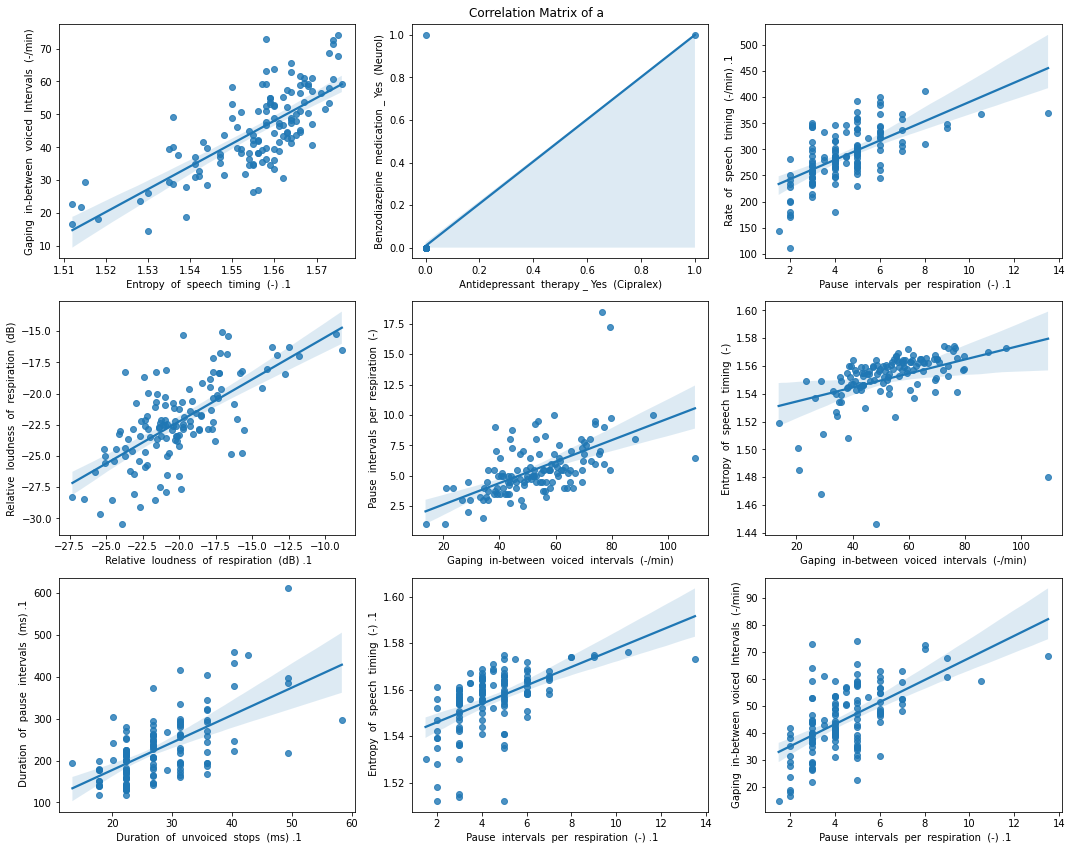

In [10]:
# In general this is not really necessary but we will still perform this
# Visualization is crucial to understand if everything works right and makes 
# sense
# should write it themself
def draw_correlation_scatter(data, dummies, length = 9, tail = False):
    """ 
    Function to draw the correlation scatter
    from the top 9 correlated variables
    data -> pandas unstacked and filtered dataframe holding correlation
    length -> variable to determine how many plots and variables should be considered
    tail -> if top correlated or anti-correlated should be used
    """
    count = 0
    plt.figure(figsize=(15, 12))
    if tail: # wants the anti-correlated data
        data = data.tail(length)
    else: # gets the top correlated variables
        data = data.head(length)
    for i,t in zip(data["Var_1"].tolist(), data["Var_2"].tolist()):
        if count == length:
            break
        ax = plt.subplot(3, 3, count + 1)
        x_data = dummies[i].values
        y_data = dummies[t].values
        sns.regplot(x = x_data, y = y_data, ax = ax)
        count +=1
        plt.tight_layout()
        plt.xlabel(i)
        plt.ylabel(t)
        plt.suptitle("Correlation Matrix of a")
    plt.show()

draw_correlation_scatter(correlation_unstack, parkinson_dummies)

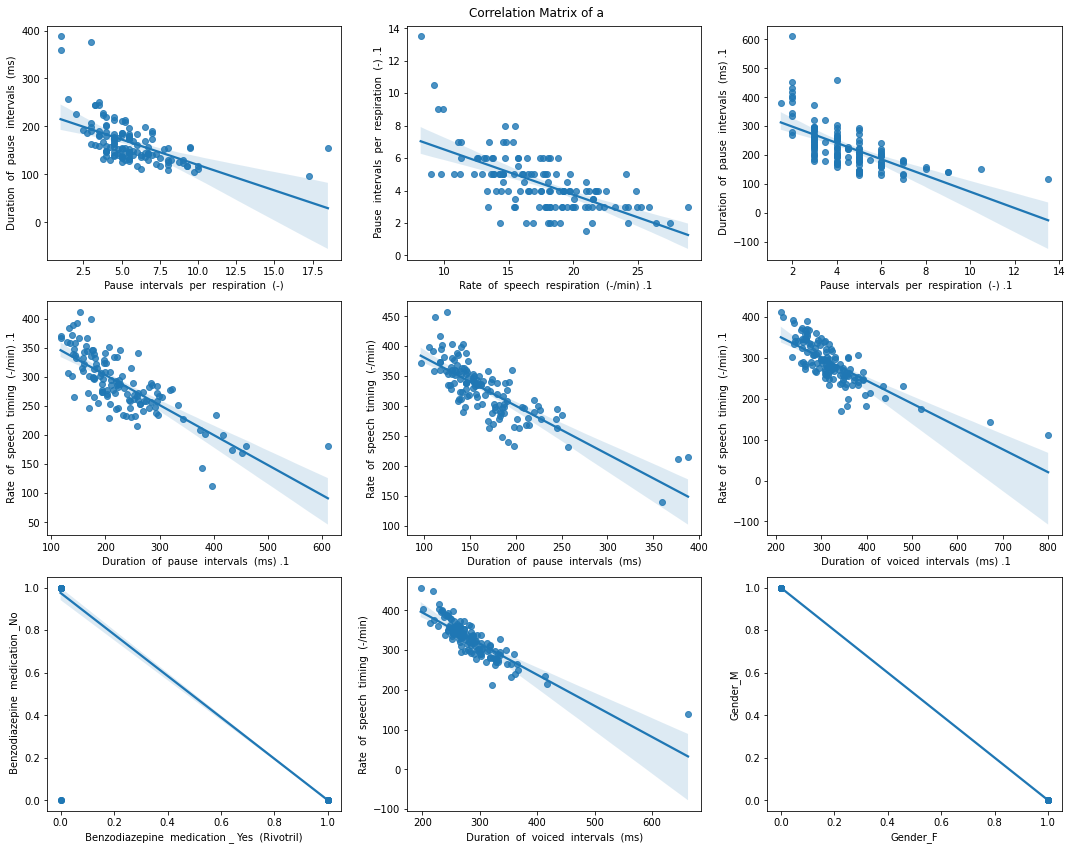

In [11]:
draw_correlation_scatter(correlation_unstack,parkinson_dummies,tail = True)

In [12]:
# draws the anticorrelated patterns
# still this gives us not a defined difference between healthy and affected people
# What would be a way to get more information that the variables are of importance?
# columns pca are the columns that show continious data
columns_pca = [i for i in parkinson_dummies.columns if parkinson_dummies[i].dtype == "float64"]+ ["disease_status"]
parkinson_pca = parkinson_dummies[columns_pca]
parkinson_pca.describe()
# what can you retrieve from this table?

,Entropy of speech timing (-),Acceleration of speech timing (-/min2),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Entropy of speech timing (-) .1,Acceleration of speech timing (-/min2) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,disease_status
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.551169,10.929769,53.262846,30.614538,-1.602854,-22.259000,5.571154,18.092308,1.555685,1.573923,45.089692,27.913385,0.045946,-20.033077,4.457692,17.447000,0.615385
std,0.019759,12.151568,15.606155,8.550477,2.805757,3.297189,2.417282,5.125033,0.013354,5.005207,12.522043,7.645818,0.592294,3.298629,1.791490,4.070072,0.488386
min,1.446000,-20.320000,13.720000,17.880000,-12.591000,-30.480000,1.000000,5.220000,1.512000,-17.870000,14.680000,13.370000,-1.417000,-27.310000,1.500000,8.210000,0.000000
25%,1.546000,3.520000,42.712500,24.622500,-2.977250,-24.152500,4.000000,15.307500,1.551000,-1.527500,36.987500,22.380000,-0.350000,-22.202500,3.000000,14.570000,0.000000
50%,1.556000,11.310000,52.675000,28.560000,-1.271500,-22.555000,5.250000,17.805000,1.558000,1.270000,44.420000,26.875000,0.034000,-20.390000,4.000000,17.585000,1.000000
75%,1.563000,17.847500,62.945000,34.750000,0.122500,-20.267500,6.500000,21.117500,1.564000,4.685000,53.532500,31.370000,0.427500,-17.887500,5.000000,19.892500,1.000000
max,1.574000,43.370000,109.500000,64.000000,5.825000,-15.040000,18.500000,40.220000,1.576000,14.640000,74.160000,58.370000,1.916000,-8.860000,13.500000,28.880000,1.000000


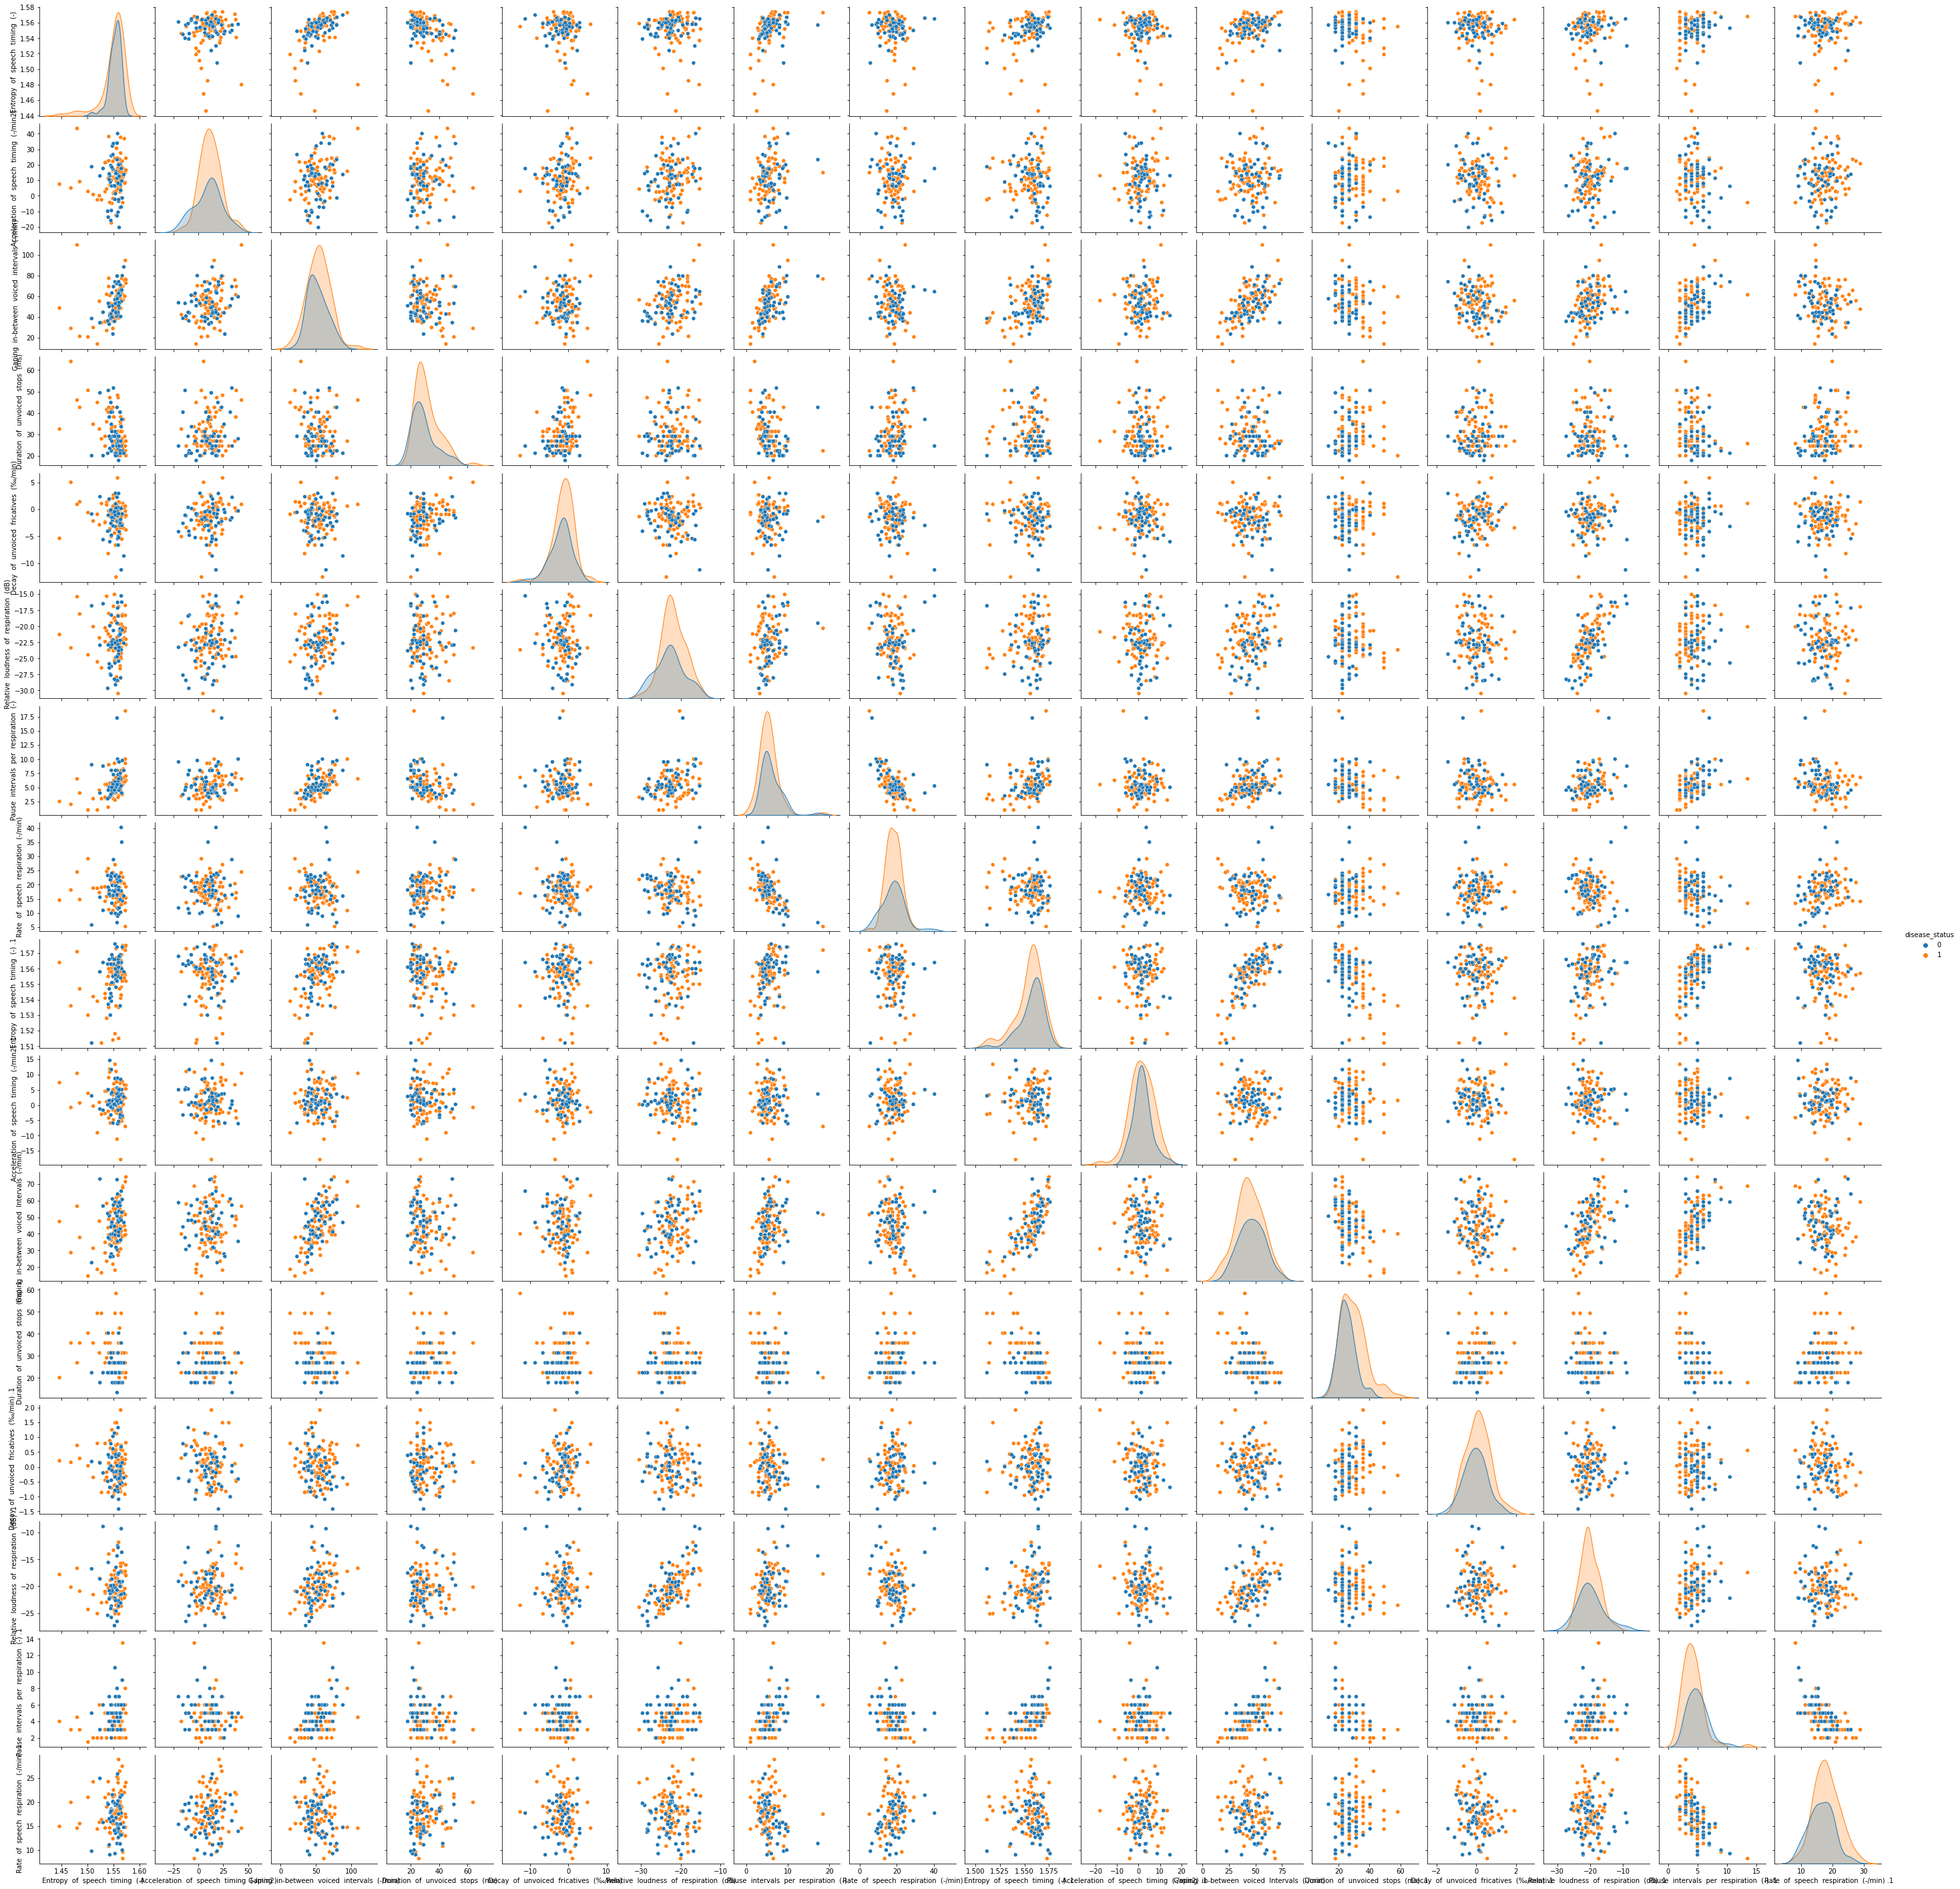

In [13]:
# this function will take long time to perform
sns.pairplot(data = parkinson_pca, hue= "disease_status")
# what does this plot show us ?

In [17]:
# Now let us perform the PCA
# What do you think about this Plot?
# How to choose the # of components to use?
# What might be problematic about this implementation right now?
# What does the standard scaler do?
components = parkinson_pca.shape[1]
pca = PCA(n_components= 2)
scaled_data = preprocessing.StandardScaler().fit_transform(parkinson_pca.iloc[:,:-1]) # leave this out
scaled_data = pd.DataFrame(scaled_data, columns = parkinson_pca.iloc[:,:-1].columns, index = parkinson_pca.index)

Text(0.5, 1.0, 'Parkinson PCA explained Variance')

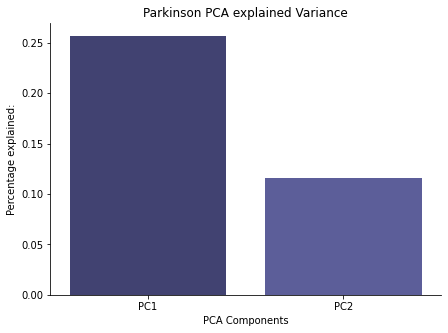

In [18]:
# Change the components to identify if there are changes nad how much explained variance should
# be in the data
pca_data = pca.fit_transform(scaled_data)
pca_explained = pca.explained_variance_ratio_
pca_components = [f"PC{i+1}" for i,t in enumerate(pca_explained)]
fig,ax = plt.subplots(figsize = (7,5))
sns.despine()
sns.barplot(x = pca_components, y = pca_explained, palette = "tab20b")
plt.xlabel("PCA Components")
plt.ylabel("Percentage explained:")
plt.title("Parkinson PCA explained Variance")

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

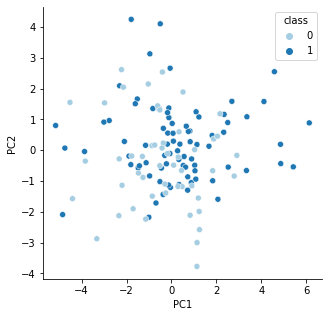

In [19]:
# Explain what is visible in this Plot
pca_df = pd.DataFrame(pca_data, columns = ["PC1","PC2"])
pca_df["class"] = parkinson_df["disease_status"]
fig,ax = plt.subplots(figsize = (5,5))
sns.despine()
sns.scatterplot(data = pca_df, x = "PC1", y = "PC2", hue = "class", palette = "Paired")

In [20]:
# model our data and using a random forest
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(parkinson_pca.iloc[:,:-1], 
                                                    parkinson_pca["disease_status"], 
                                                    test_size=0.20, 
                                                    random_state=42)
rf_model = RandomForestClassifier(n_estimators=11, random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=11, random_state=44)

In [21]:
#
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5769
